In [1]:
#jupyter labextension install jupyterlab-plotly


In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import plotly.express as px

In [3]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42,
    n_features=4
 )

In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
 )

In [6]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [7]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
    "random_state": 42,
}

 # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

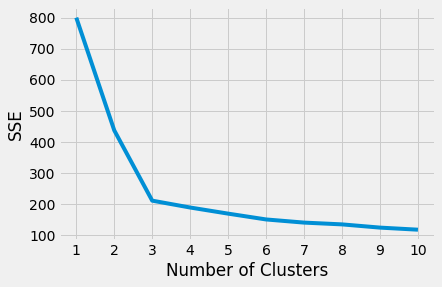

In [8]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [9]:
kl = KneeLocator(
     range(1, 11), sse, curve="convex", direction="decreasing"
 )
kl.elbow

3

In [10]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

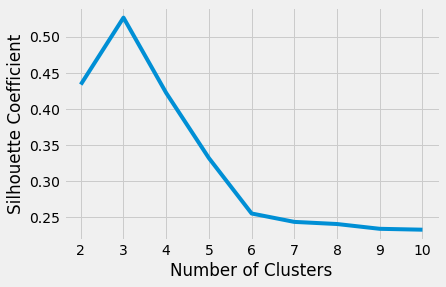

In [11]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [12]:
df = pd.DataFrame(scaled_features, columns=['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4'])

y = kmeans.fit_predict(df[['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4']])

df['Cluster'] = y

print(df.head())

     Feat_1    Feat_2    Feat_3    Feat_4  Cluster
0 -1.072467 -1.307327 -0.374463  0.759528        2
1 -0.816863 -1.458514 -0.702862 -0.068152        9
2 -1.495484 -1.903414 -1.269737  0.289979        6
3 -0.925699 -0.974983  0.013665 -0.561125        9
4 -0.248789  0.925312 -0.644386  0.693477        4


In [13]:
X = np.array(df[['Feat_1', 'Feat_2', 'Feat_3', 'Feat_4']])
pca = PCA(n_components=2)
components = pca.fit_transform(X)

In [14]:
x = [components[i][0] for i,e in enumerate(components)]
y = [components[i][1] for i,e in enumerate(components)]

In [15]:
df.head()

,Feat_1,Feat_2,Feat_3,Feat_4,Cluster
0,-1.072467,-1.307327,-0.374463,0.759528,2
1,-0.816863,-1.458514,-0.702862,-0.068152,9
2,-1.495484,-1.903414,-1.269737,0.289979,6
3,-0.925699,-0.974983,0.013665,-0.561125,9
4,-0.248789,0.925312,-0.644386,0.693477,4


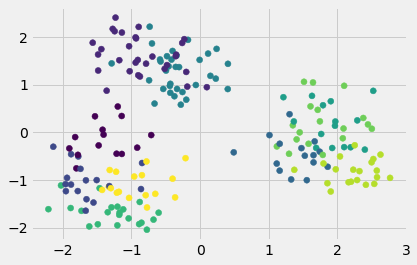

In [16]:
fig = plt.scatter(x,y,c=df['Cluster'])

In [24]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()